In [1]:
# common packages 
import numpy as np 
import os
import struct

#visuals
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

# code by Hugo
import Utility 
import PythonKEX 

In [2]:
#define dataset
Kanyl = True
LM_paths, sino_paths, title, _ = PythonKEX.define_KEX_dataset(isKanyl=Kanyl)

In [3]:
#calculate histograms
histograms = []
for path in LM_paths:
    h = Utility.listmodePathToHistogram(path)
    histograms.append(h)
    
extras_titles = [] 
extras_histograms = []

In [4]:
#Alternatively read histograms (sinograms) from file
histograms = []
for path in sino_paths:
    with open(path, "rb") as file:
        sino_1D = np.fromfile(file, dtype=np.ushort)
        histograms.append(np.reshape(sino_1D, 
                          (Utility.NUMBER_OF_VIEWS,
                           Utility.NUMBER_OF_PROJECTIONS,  
                           Utility.NUMBER_OF_SINOGRAMS, 
                           1+len(Utility.TOF_OFFSET_MAP))))
extras_titles = [] 
extras_histograms = []

In [5]:
#sum togeter
ungated_histogram = np.sum(histograms, axis=0)
extras_titles.append("ungated")
extras_histograms.append(ungated_histogram)

In [6]:
#calculate difference
difference_histogram = np.array(histograms[0], dtype=int) - np.array(histograms[1], dtype=int)
extras_titles.append("difference")
extras_histograms.append(difference_histogram)

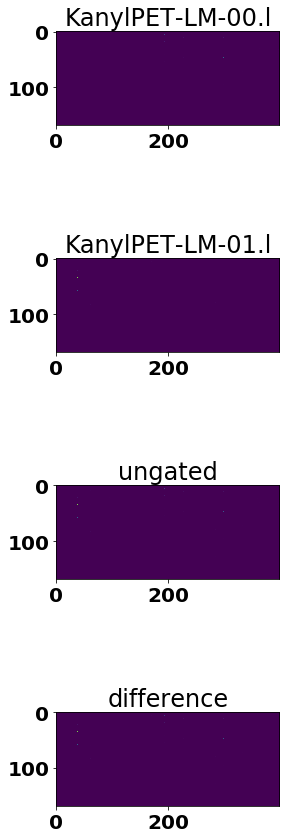

In [12]:
#check results


rows = len(LM_paths)+len(extras_titles)
sz = 4
plt.figure(figsize=(sz, rows*sz))
mi = 50
tof_bin = 0
for k in range(0, len(LM_paths)) :
    plt.subplot(rows,1,k+1)
    plt.imshow(histograms[k][:,:,mi, tof_bin])
    
    plt.title(LM_paths[k].split('/')[6])
for k in range(0,len(extras_titles)):
    plt.subplot(rows, 1, k+1+len(LM_paths))
    plt.imshow(ungated_histogram[:,:,mi, tof_bin])
    plt.title(extras_titles[k])
plt.show()